<a href="https://colab.research.google.com/github/amirrahimi8222/Artificial_Inteligence/blob/main/secondex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1W05WuO7SF9OsyLKiYzAcUi9qdnxbR_UP

Downloading...
From: https://drive.google.com/uc?id=1W05WuO7SF9OsyLKiYzAcUi9qdnxbR_UP
To: /content/data.npy
100% 928/928 [00:00<00:00, 2.98MB/s]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = np.load('/content/data.npy')

سوال دوم بخش اول

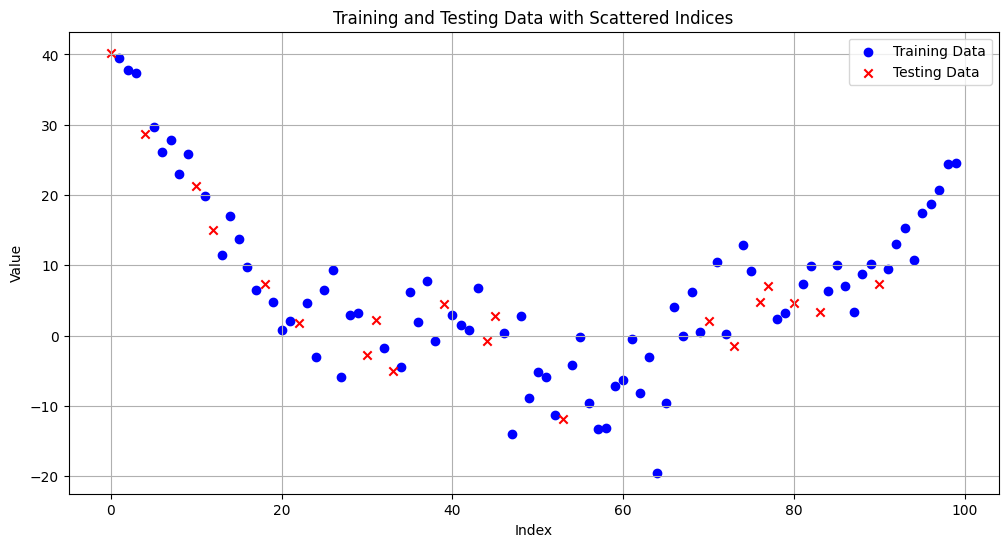

In [5]:
# Generate shuffled indices
indices = np.arange(len(data))
np.random.seed(42)
np.random.shuffle(indices)

# Split the indices into training and testing sets
test_size = int(0.2 * len(data))  # 20% for testing
test_indices = indices[:test_size]
train_indices = indices[test_size:]

# Prepare training and testing data
train_data = data[train_indices]
test_data = data[test_indices]

# Plot the training and testing data
plt.figure(figsize=(12, 6))
plt.scatter(train_indices, train_data, label='Training Data', color='blue', marker='o')
plt.scatter(test_indices, test_data, label='Testing Data', color='red', marker='x')
plt.title('Training and Testing Data with Scattered Indices')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

قسمت سوم

Model Coefficients: w1 = -0.112, w0 = 11.860
Mean Squared Error (MSE): 134.348
Mean Absolute Error (MAE): 9.267
Root Mean Squared Error (RMSE): 11.591


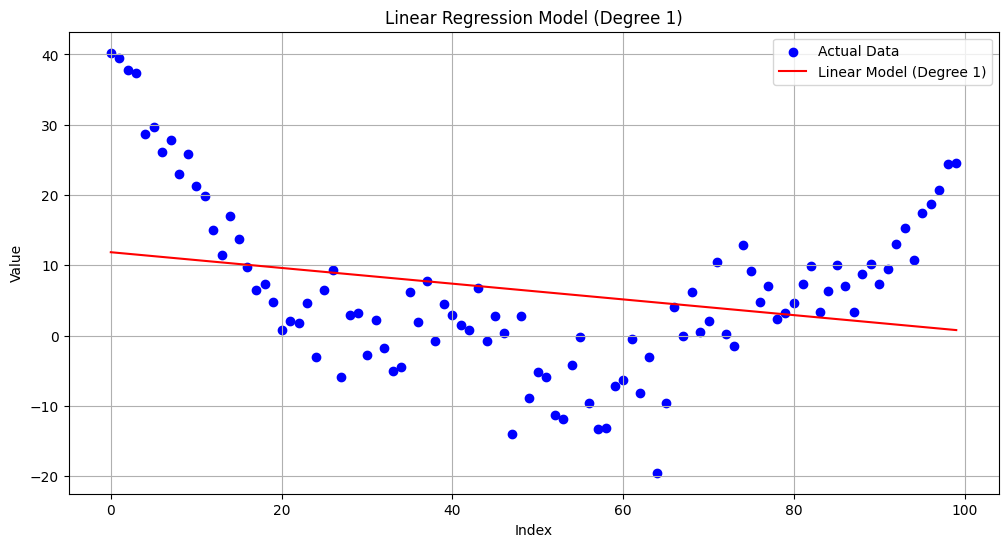

In [6]:

x = np.arange(len(data))  # x=data indexes
y = data

# Step 1: Calculate the coefficients w1 and w0
x_mean = np.mean(x)
y_mean = np.mean(y)
w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
w0 = y_mean - w1 * x_mean

# Step 2: Predict the values using the linear model
y_pred = w1 * x + w0

# Step 3: Calculate performance metrics
mse = np.mean((y - y_pred)**2)
mae = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(mse)

# Print coefficients and evaluation metrics
print(f"Model Coefficients: w1 = {w1:.3f}, w0 = {w0:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# Step 4: Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Actual Data', color='blue', marker='o')
plt.plot(x, y_pred, label='Linear Model (Degree 1)', color='red')
plt.title('Linear Regression Model (Degree 1)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


بخش چهارم

<ipython-input-8-aab1c99e712c>:22: RuntimeWarning: invalid value encountered in scalar divide
  w1 = np.sum((x_subset - x_mean) * (y_subset - y_mean)) / np.sum((x_subset - x_mean)**2)


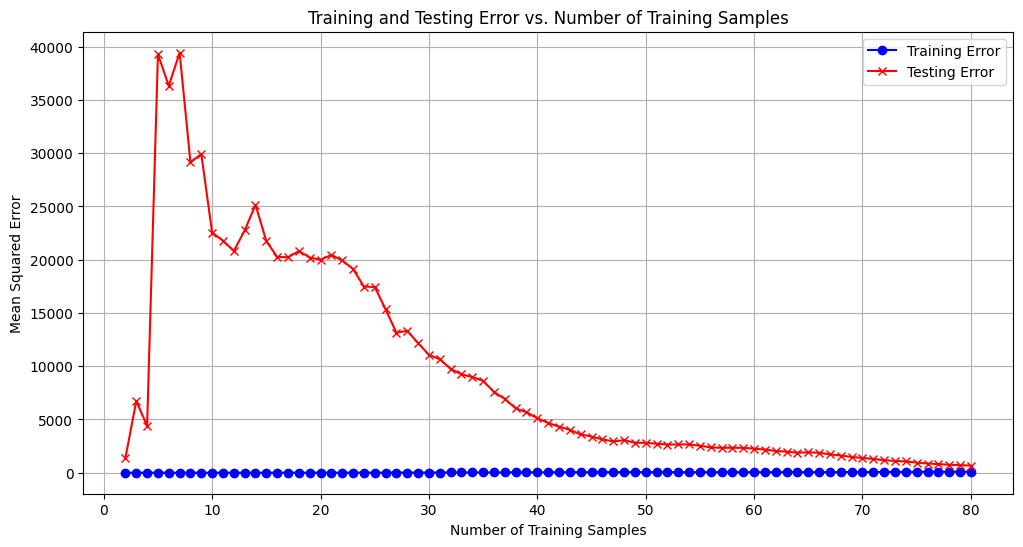

669.2249959029334


In [8]:

x = np.arange(len(data))
y = data

# Split the data into training and testing sets
train_size = int(0.8 * len(data))  # 80% for training
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

# Initialize lists to store errors
train_errors = []
test_errors = []

# Incrementally train the model
for i in range(1, len(x_train) + 1):
    # Use the first i samples for training
    x_subset = x_train[:i]
    y_subset = y_train[:i]

    # Calculate the coefficients for the linear regression model
    x_mean = np.mean(x_subset)
    y_mean = np.mean(y_subset)
    w1 = np.sum((x_subset - x_mean) * (y_subset - y_mean)) / np.sum((x_subset - x_mean)**2)
    w0 = y_mean - w1 * x_mean

    # Predict values for training and testing sets
    y_train_pred = w1 * x_train + w0
    y_test_pred = w1 * x_test + w0

    # Calculate errors
    train_error = np.mean((y_train[:i] - y_train_pred[:i])**2)  # MSE for training
    test_error = np.mean((y_test - y_test_pred)**2)             # MSE for testing

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the errors
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(x_train) + 1), train_errors, label='Training Error', color='blue', marker='o')
plt.plot(range(1, len(x_train) + 1), test_errors, label='Testing Error', color='red', marker='x')
plt.title('Training and Testing Error vs. Number of Training Samples')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()
print(test_errors[-1])


قسمت ششم

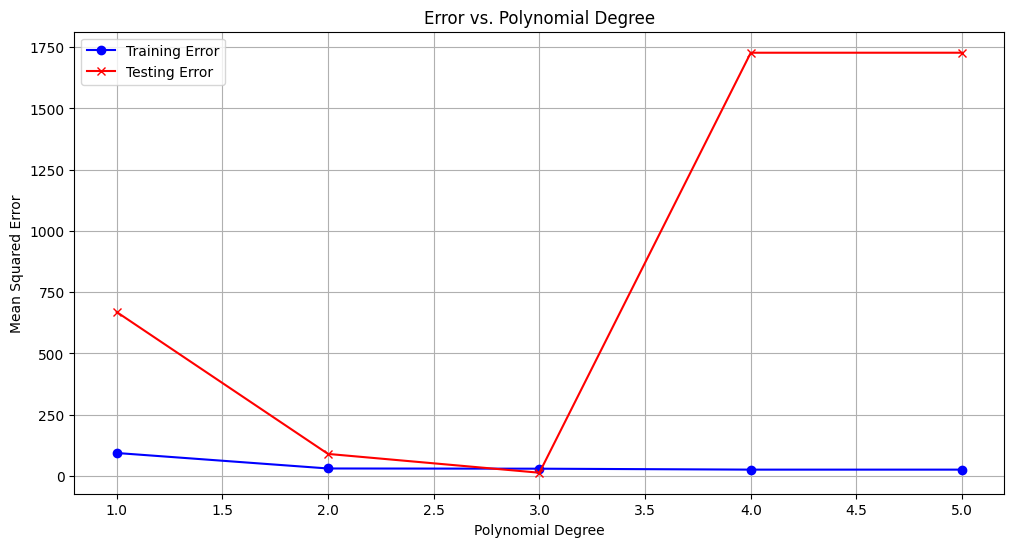

In [9]:

x = np.arange(len(data))
y = data

# Split the data into training and testing sets
train_size = int(0.8 * len(data))  # 80% for training
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

# Initialize lists to store errors
train_errors = []
test_errors = []

# Loop through polynomial degrees
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # Create polynomial features
    x_train_poly = np.vstack([x_train**i for i in range(degree + 1)]).T
    x_test_poly = np.vstack([x_test**i for i in range(degree + 1)]).T

    # Solve for weights using least squares (normal equation)
    w = np.linalg.inv(x_train_poly.T @ x_train_poly) @ x_train_poly.T @ y_train

    # Predict for train and test sets
    y_train_pred = x_train_poly @ w
    y_test_pred = x_test_poly @ w

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the errors
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_errors, label='Training Error', color='blue', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', color='red', marker='x')
plt.title('Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


قسمت هفتم

Model Comparison Results:
Linear Regression: Train Error = 138.35, Test Error = 119.04
Decision Tree: Train Error = 10.89, Test Error = 35.03
Random Forest: Train Error = 8.88, Test Error = 30.22


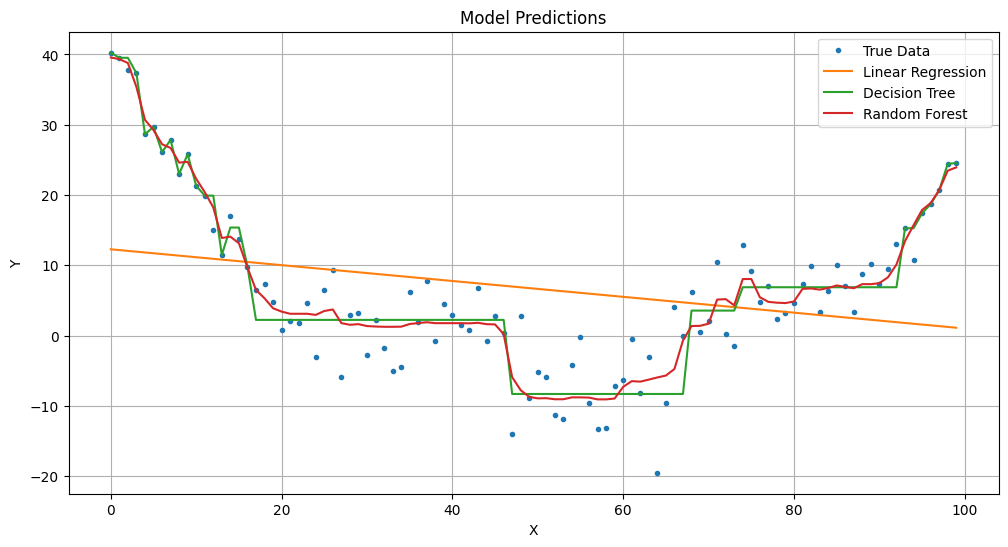

In [12]:
x = np.arange(len(data)).reshape(-1, 1)  # فرض کنید x شاخص‌ها است
y = data

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=63)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=63),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=63)
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    results[name] = {"Train Error": train_error, "Test Error": test_error}

# Display results
print("Model Comparison Results:")
for name, metrics in results.items():
    print(f"{name}: Train Error = {metrics['Train Error']:.2f}, Test Error = {metrics['Test Error']:.2f}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o', label='True Data', markersize=3)
for name, model in models.items():
    y_pred = model.predict(x)
    plt.plot(x, y_pred, label=name)
plt.title("Model Predictions")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

امتیازی

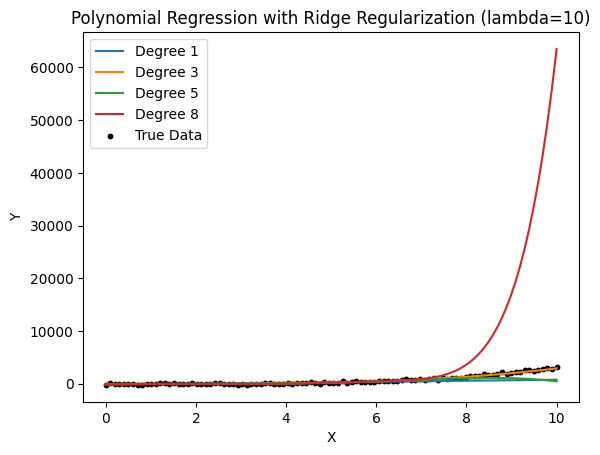

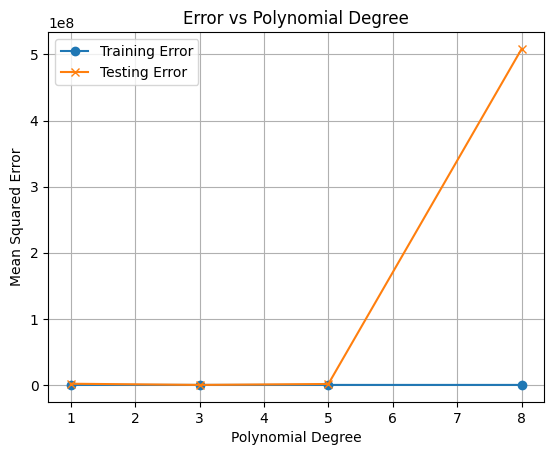

In [13]:

# Set the random seed for reproducibility
np.random.seed(63)

# Generate sample data
x = np.linspace(0, 10, 100)
y = 5 * x**3 - 20 * x**2 + 10 * x + np.random.normal(0, 100, len(x))

# Function to generate polynomial features
def polynomial_features(x, degree):
    return np.column_stack([x**i for i in range(degree + 1)])

# Ridge regression implementation
def ridge_regression(X, y, lambda_reg):
    # X.T @ X + lambda * I
    n_features = X.shape[1]
    I = np.eye(n_features)  # Identity matrix
    I[0, 0] = 0  # Exclude bias term from regularization
    w = np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y
    return w

# Degrees of the polynomial model to test
degrees = [1, 3, 5, 8]
lambda_reg = 10  # Regularization strength
train_errors = []
test_errors = []

# Split data into training and testing sets
x_train, x_test = x[:70], x[70:]
y_train, y_test = y[:70], y[70:]

for degree in degrees:
    # Generate polynomial features
    X_train = polynomial_features(x_train, degree)
    X_test = polynomial_features(x_test, degree)

    # Train the model with regularization
    w = ridge_regression(X_train, y_train, lambda_reg)

    # Make predictions
    y_train_pred = X_train @ w
    y_test_pred = X_test @ w

    # Calculate errors
    train_error = np.mean((y_train - y_train_pred)**2)
    test_error = np.mean((y_test - y_test_pred)**2)

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Plot the model predictions
    plt.plot(x, polynomial_features(x, degree) @ w, label=f"Degree {degree}")

# Plot the true data and model predictions
plt.scatter(x, y, color='black', label='True Data', s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f"Polynomial Regression with Ridge Regularization (lambda={lambda_reg})")
plt.show()

# Plot the training and testing errors
plt.plot(degrees, train_errors, 'o-', label='Training Error')
plt.plot(degrees, test_errors, 'x-', label='Testing Error')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.title("Error vs Polynomial Degree")
plt.show()
